In [1]:
import requests
import json
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.set(color_codes=True)

Step 1. Get the data from API and make a dataframe

In [2]:
# Make request to an URL
response = requests.get('http://localhost:8080/medish_centrum_randstad/api/netlify?page=1')

In [5]:
file_contents= response.json()  #dictionary
print(type(file_contents))
print(len(file_contents))

<class 'dict'>
6


In [6]:
df = pd.DataFrame.from_dict(file_contents['data']) #all the needed info was condensed into one data column called 'data'
display(df.head())
display(df.shape)

,genetic,length,mass,exercise,smoking,alcohol,sugar,lifespan
0,84.0,180.0,90.0,2.0,9.0,1.0,2,86
1,84.0,204.0,79.0,3.0,2.0,7.0,3,100
2,84.0,174.0,74.0,3.0,20.0,3.0,2,87
3,84.0,187.0,78.0,2.0,6.0,5.0,3,91
4,84.0,187.0,89.0,2.0,12.0,0.0,2,83


(8192, 8)

In [7]:
df= df[['genetic','length','mass','exercise','smoking','alcohol','sugar','lifespan']]
df.dropna(inplace=True)
print(df)

      genetic  length  mass  exercise  smoking  alcohol  sugar  lifespan
0        84.0   180.0  90.0       2.0      9.0      1.0      2        86
1        84.0   204.0  79.0       3.0      2.0      7.0      3       100
2        84.0   174.0  74.0       3.0     20.0      3.0      2        87
3        84.0   187.0  78.0       2.0      6.0      5.0      3        91
4        84.0   187.0  89.0       2.0     12.0      0.0      2        83
...       ...     ...   ...       ...      ...      ...    ...       ...
8187     82.0   185.0  67.0       3.0     11.0      8.0      2        90
8188     82.0   183.0  72.0       2.0      1.0      5.0      4        88
8189     83.0   192.0  92.0       1.0     22.0      2.0      4        62
8190     81.0   175.0  60.0       3.0     13.0      7.0      2        93
8191     83.0   204.0  76.0       3.0      8.0      8.0      1        96

[8185 rows x 8 columns]


Step 3. Define BMI and Exploratory Data Analysis 

In [8]:
#Define BMI
df['BMI'] = df['mass']/(df['length']/100)**2
display(df.head())

,genetic,length,mass,exercise,smoking,alcohol,sugar,lifespan,BMI
0,84.0,180.0,90.0,2.0,9.0,1.0,2,86,27.777778
1,84.0,204.0,79.0,3.0,2.0,7.0,3,100,18.983083
2,84.0,174.0,74.0,3.0,20.0,3.0,2,87,24.441802
3,84.0,187.0,78.0,2.0,6.0,5.0,3,91,22.305471
4,84.0,187.0,89.0,2.0,12.0,0.0,2,83,25.451114


In [9]:
#Why is it missing? Is it random?
#Impute or delete?
df = df.dropna()
df.head()

,genetic,length,mass,exercise,smoking,alcohol,sugar,lifespan,BMI
0,84.0,180.0,90.0,2.0,9.0,1.0,2,86,27.777778
1,84.0,204.0,79.0,3.0,2.0,7.0,3,100,18.983083
2,84.0,174.0,74.0,3.0,20.0,3.0,2,87,24.441802
3,84.0,187.0,78.0,2.0,6.0,5.0,3,91,22.305471
4,84.0,187.0,89.0,2.0,12.0,0.0,2,83,25.451114


From boxplot we can check the outliers. I tried 2 ways to remove the outliers. One way is using IQR. The ohter way is using DBSCAN cluster. According to correlation gradient there were no differences in coreelation.  Therefore outliers does not make any difference. I decided to keep the outliers.

<AxesSubplot: ylabel='exercise'>

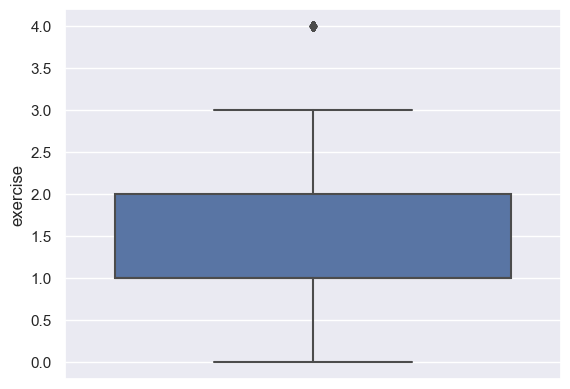

In [12]:
sns.boxplot(y=df['exercise'])

#Q1=df['exercise'].quantile(0.25)
#print("Q1:", Q1)

#Q3=df['exercise'].quantile(0.75)
#print("Q3:", Q3)

#IQR=Q3-Q1
#print("IQR: ", IQR)

#lower_bound = Q1 - 1.5*IQR
#print("Lower Bound:", lower_bound)

#upper_bound = Q3 + 1.5*IQR
#print("Upper Bound:", upper_bound)

In [13]:
from sklearn.cluster import DBSCAN

DBSCAN, which stands for density-based spatial clustering of applications with noise, is an unsupervised clustering algorithm. This approach identifies any points that are loosely packed or sit alone outside of densely packed clusters as outliers.

In [14]:
X_train = df[['exercise','lifespan']]

In [15]:
model = DBSCAN()
model.fit(X_train)

DBSCAN()

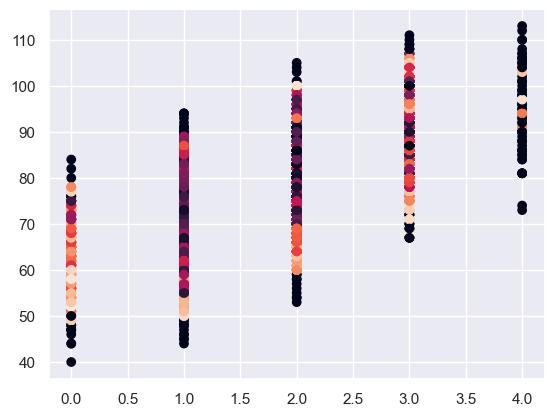

In [16]:
cluster_labels = model.labels_
plt.scatter(df["exercise"], df["lifespan"], c = cluster_labels)
plt.show()

In [17]:
df['labels'] = cluster_labels

In [18]:
df_cluster_clean = df[df['labels'] != -1]

* Clean up outliers.

<AxesSubplot: xlabel='exercise', ylabel='lifespan'>

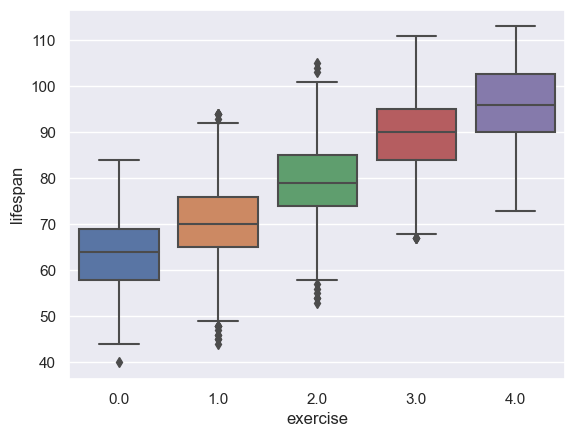

In [19]:
sns.boxplot(data=df, y= 'lifespan', x='exercise')

In [25]:
df_corr = df[['genetic',
      'length', 'mass', 
      'exercise', 'smoking',
       'alcohol', 'sugar', 'BMI','lifespan']].dropna().corr()
df_corr.style.background_gradient(cmap='RdBu')

,genetic,length,mass,exercise,smoking,alcohol,sugar,BMI,lifespan
genetic,1.000000,-0.002151,-0.010059,0.004464,-0.011032,0.003612,-0.006626,-0.008285,0.152144
length,-0.002151,1.000000,0.017750,-0.007252,-0.008966,0.006750,-0.015262,-0.661776,0.179911
mass,-0.010059,0.017750,1.000000,0.004304,0.016148,-0.002182,0.006780,0.726123,-0.201487
exercise,0.004464,-0.007252,0.004304,1.000000,-0.012758,0.005955,-0.009249,0.005278,0.677365
smoking,-0.011032,-0.008966,0.016148,-0.012758,1.000000,0.001413,-0.001368,0.019498,-0.525613
alcohol,0.003612,0.006750,-0.002182,0.005955,0.001413,1.000000,0.013864,-0.006255,-0.216818
sugar,-0.006626,-0.015262,0.006780,-0.009249,-0.001368,0.013864,1.000000,0.014230,-0.263895
BMI,-0.008285,-0.661776,0.726123,0.005278,0.019498,-0.006255,0.014230,1.000000,-0.276963
lifespan,0.152144,0.179911,-0.201487,0.677365,-0.525613,-0.216818,-0.263895,-0.276963,1.000000


lifespan is highly correlated to exercise. IQR method and DBSCAN cluster method showed same result.
Therefore we will remove outliers for a variabel,'exercise'.